In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as colors


from datetime import datetime,timezone 

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
### Function to plot basemap and lon lat labels ###
def plot_background(ax):
    ax.add_feature(cf.LAKES.with_scale('10m'),facecolor='none', edgecolor='black',linewidth=0.8)
    ax.add_feature(cf.COASTLINE.with_scale('10m'),facecolor='none', edgecolor='black', linewidth=1) 
    return ax

def plot_ticks(ax):
    ax.set_yticks(np.arange(5, 22, 5), crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(115, 127, 5), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    return ax

In [4]:
from matplotlib.colors import LinearSegmentedColormap


color_dict1 = {'skyblue': '#3498DB',
               'green1': '#7CFC00',
               'red1' : '#E74C3C',
               'yellow1' : '#F6F91A',
               'violet1' : '#8E44AD',
               'orange1' : '#FFBF00',
               'pink1': '#FFC0CB',
               'cornsilk': '#FFF8DC',
               'gray' : '#808080'
               }

mycolorbar1 = LinearSegmentedColormap.from_list('mycolorbar1', [
    color_dict1['skyblue'],
    color_dict1['green1'],
    color_dict1['red1'],
    color_dict1['yellow1'],
    color_dict1['violet1']])

'''
    color_dict1['orange1'],
    color_dict1['pink1'],
    color_dict1['cornsilk'],
    color_dict1['gray']'''

"\n    color_dict1['orange1'],\n    color_dict1['pink1'],\n    color_dict1['cornsilk'],\n    color_dict1['gray']"

In [5]:
df = pd.read_csv('pa_clusters_all_noTC.csv')
df.loc[ df["cluster_2"] == 1, "cluster2"] = 2
df.loc[ df["cluster_2"] == 2, "cluster2"] = 1
df['cluster2'] = df['cluster2'].astype(int)
df['cluster_2'] = df['cluster2']


In [6]:
df = pd.melt(df, id_vars=['lon','lat','cluster_2', 'cluster_3',
       'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8',
       'cluster_9'], value_vars=['2013-05-01 00:00:00',
       '2013-05-01 01:00:00', '2013-05-01 02:00:00', '2013-05-01 03:00:00',
       '2013-05-01 04:00:00', '2013-05-01 05:00:00', '2013-05-01 06:00:00',
       '2013-05-01 07:00:00', '2013-05-01 08:00:00', '2013-05-01 09:00:00',
       '2013-05-01 10:00:00', '2013-05-01 11:00:00', '2013-05-01 12:00:00',
       '2013-05-01 13:00:00', '2013-05-01 14:00:00', '2013-05-01 15:00:00',
       '2013-05-01 16:00:00', '2013-05-01 17:00:00', '2013-05-01 18:00:00',
       '2013-05-01 19:00:00', '2013-05-01 20:00:00', '2013-05-01 21:00:00',
       '2013-05-01 22:00:00', '2013-05-01 23:00:00'])
df['time'] = pd.to_datetime(df.variable)
df['hr'] = df['time'].dt.hour


In [7]:
sum_2 = df.groupby(['cluster_2','hr']).agg({'value': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()
sum_3 = df.groupby(['cluster_3','hr']).agg({'value': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()
sum_4 = df.groupby(['cluster_4','hr']).agg({'value': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()
sum_5 = df.groupby(['cluster_5','hr']).agg({'value': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()

In [8]:
sum_3.to_csv('pa_clusters_peaks.csv')
sum_3.max()

cluster_3      3.000000
hr            23.000000
mean           2.161608
max            3.457085
min            0.784175
std            0.489137
count        270.000000
dtype: float64

In [9]:
df[(df['hr'] == 0) & (df['cluster_3'] == 1)].count() #270

lon          270
lat          270
cluster_2    270
cluster_3    270
cluster_4    270
cluster_5    270
cluster_6    270
cluster_7    270
cluster_8    270
cluster_9    270
variable     270
value        270
time         270
hr           270
dtype: int64

In [10]:
df[(df['hr'] == 0) & (df['cluster_3'] == 2)].count() #176

lon          176
lat          176
cluster_2    176
cluster_3    176
cluster_4    176
cluster_5    176
cluster_6    176
cluster_7    176
cluster_8    176
cluster_9    176
variable     176
value        176
time         176
hr           176
dtype: int64

In [11]:
df[(df['hr'] == 0) & (df['cluster_3'] == 3)].count() #176

lon          176
lat          176
cluster_2    176
cluster_3    176
cluster_4    176
cluster_5    176
cluster_6    176
cluster_7    176
cluster_8    176
cluster_9    176
variable     176
value        176
time         176
hr           176
dtype: int64

In [12]:
43.4+28.3+28.3

100.0

In [13]:
100*270/(270+176+176)

43.40836012861736

In [14]:
100*176/(270+176+176)

28.29581993569132

lon          176
lat          176
cluster_2    176
cluster_3    176
cluster_4    176
cluster_5    176
cluster_6    176
cluster_7    176
cluster_8    176
cluster_9    176
variable     176
value        176
time         176
hr           176
dtype: int64
lon          176
lat          176
cluster_2    176
cluster_3    176
cluster_4    176
cluster_5    176
cluster_6    176
cluster_7    176
cluster_8    176
cluster_9    176
variable     176
value        176
time         176
hr           176
dtype: int64


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_2765/2406300020.py:118: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/pa_cluster_3.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


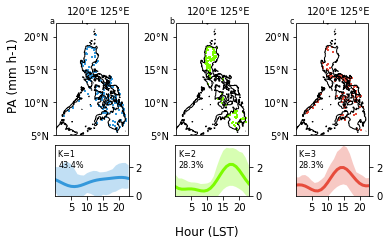

In [33]:
mycolorbar1 = LinearSegmentedColormap.from_list('mycolorbar1', [
    color_dict1['skyblue'],color_dict1['green1'],color_dict1['red1'],color_dict1['skyblue']])
                                               


s = 1
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(10, 12)


ax1 = fig.add_subplot(gs[0:2, 0:2], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0:2, 3:5], projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[0:2, 6:8], projection=ccrs.PlateCarree())
ax11 = fig.add_subplot(gs[2, 0:2])
ax22 = fig.add_subplot(gs[2, 3:5])
ax33 = fig.add_subplot(gs[2, 6:8])

plot_background(ax1)
plot_ticks(ax1)
plot_background(ax2)
plot_ticks(ax2)
plot_background(ax3)
plot_ticks(ax3)


cmap = mycolorbar1
bounds = np.arange(0.5,5,1)
norm = colors.BoundaryNorm(bounds,cmap.N)  


t = df[df['cluster_3']== 1]
cs = ax1.scatter(t['lon'], t['lat'], c='#3498DB', s=s, marker="s", transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.xaxis.tick_top()
ax1.text(115, 22, 'a',  fontsize=8)

t = df[df['cluster_3']== 2]
print(t[(t['hr'] == 0)].count() )
cs = ax2.scatter(t['lon'], t['lat'], c='#7CFC00', s=s, marker="s", transform=ccrs.PlateCarree())
ax2.set_xlim(116,127)
ax2.set_ylim(5,22)
ax2.xaxis.tick_top()
ax2.text(115, 22, 'b',  fontsize=8)

t = df[df['cluster_3']== 3]
print(t[(t['hr'] == 0)].count() )
cs = ax3.scatter(t['lon'], t['lat'], c='#E74C3C', s=s, marker="s", transform=ccrs.PlateCarree())
ax3.set_xlim(116,127)
ax3.set_ylim(5,22)
ax3.xaxis.tick_top()
ax3.text(115, 22, 'c',  fontsize=8)



################################################################
s = sum_3[sum_3['cluster_3'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
max_ = s['max']
min_ = s['min']
ax11.plot(t, mu1, lw=3, label='opaque', color='#3498DB')
ax11.fill_between(t, min_, max_, facecolor='#3498DB', alpha=0.3)
ax11.yaxis.tick_right() 
ax11.text(1, 2., 'K=1 \n43.4%',  fontsize=8)
#ax11.text(-1.7, 1.8, 'c',  fontsize=8)
################################################################
s = sum_3[sum_3['cluster_3'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
max_ = s['max']
min_ = s['min']
ax22.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax22.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)
ax22.yaxis.tick_right() 
ax22.text(1, 2., 'K=2 \n28.3%', fontsize=8)
#ax22.text(-1.7, 2, 'b',  fontsize=8)
################################################################
s = sum_3[sum_3['cluster_3'] == 3]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
max_ = s['max']
min_ = s['min']
ax33.plot(t, mu1, lw=3, label='opaque', color='#E74C3C')
ax33.fill_between(t, min_, max_, facecolor='#E74C3C', alpha=0.3)
ax33.yaxis.tick_right() 
ax33.text(1, 2., 'K=3 \n28.3%',  fontsize=8)
#ax33.text(-1.7, 1.8, 'c',  fontsize=8)
################################################################

################################################################
ax11.set_xlim(0,23)
ax11.set_ylim(0,3.5)
ax22.set_xlim(0,23)
ax22.set_ylim(0,3.5)
ax33.set_xlim(0,23)
ax33.set_ylim(0,3.5)
ax11.set_xticks([5,10,15,20])
ax22.set_xticks([5,10,15,20])
ax33.set_xticks([5,10,15,20])
ax11.text(-15, 6, 'PA (mm h-1)', rotation=90, fontsize=12)
ax22.text(0, -2.7, 'Hour (LST)', fontsize=12)
################################################################
#ax1.text(128, 15, 'PA (mm h-1)', rotation=90, fontsize=12)
#ax1.text(128, 6, 'PA (mm h-1)', rotation=90, fontsize=12)


#ax11.text(8, -1.8, 'Hour (LST)', fontsize=12)
#plt.text(-3, 0.67, 'Cluster Number', rotation=90, fontsize=15)

images_dir = 'Images'
plt.savefig(f"{images_dir}/pa_cluster_3.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


In [ ]:
mycolorbar1 = LinearSegmentedColormap.from_list('mycolorbar1', [
    color_dict1['skyblue'],color_dict1['green1'],color_dict1['red1'],color_dict1['yellow1']])
                                               


s = 10
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(8, 12)


ax1 = fig.add_subplot(gs[0:4, 0:4], projection=ccrs.PlateCarree())
ax11 = fig.add_subplot(gs[0:1, 5:9])
ax22 = fig.add_subplot(gs[1:2, 5:9])
ax33 = fig.add_subplot(gs[2:3, 5:9])
ax44 = fig.add_subplot(gs[3:4, 5:9])

plot_background(ax1)
plot_ticks(ax1)


cmap = mycolorbar1
bounds = np.arange(0.5,5,1)
norm = colors.BoundaryNorm(bounds,cmap.N)  
t = df[df['cluster_4']== 3]
cs = ax1.scatter(t['lon'], t['lat'], c=t['cluster_4'],  s=s, marker="s", transform=ccrs.PlateCarree())
#cs = ax1.scatter(df['lon'], df['lat'], c=df['cluster_4'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.text(115, 22, 'a',  fontsize=15)
cax = fig.add_axes([0.85, 0.67, 0.02, 0.15])

cb = fig.colorbar(cs, cax=cax, ticks=bounds)
cb.set_ticks([1,2,3,4,5])
cb.set_ticklabels([1,2,3,4,5])
cb.ax.tick_params(labelsize=20)


################################################################
s = sum_4[sum_4['cluster_4'] == 3]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
max_ = s['max']
min_ = s['min']
ax11.plot(t, mu1, lw=3, label='opaque', color='#3498DB')
ax11.fill_between(t, min_, max_, facecolor='#3498DB', alpha=0.3)
ax11.yaxis.tick_right() 
ax11.text(1, 1, 'K= \n%',  fontsize=12)
ax11.text(-1.7, 1.8, 'c',  fontsize=15)


In [41]:
sum_2[sum_2['cluster_2'] == 1]

,cluster_2,hr,mean,max,min,std,count
0,1,0,-0.174069,0.330098,-0.562542,0.162162,194
1,1,1,-0.176267,0.436227,-0.559922,0.154333,194
2,1,2,-0.188640,0.521126,-0.529233,0.146203,194
3,1,3,-0.226547,0.564670,-0.505323,0.138038,194
4,1,4,-0.293321,0.551893,-0.555792,0.133576,194
5,1,5,-0.378455,0.476446,-0.703913,0.134167,194
6,1,6,-0.459918,0.342967,-0.810816,0.134985,194
7,1,7,-0.509998,0.166897,-0.827174,0.130328,194
8,1,8,-0.503135,-0.028269,-0.831967,0.122415,194
9,1,9,-0.423595,0.129768,-0.777500,0.125744,194


/var/folders/xg/0rj41p2x6kj48mvld4lq9c380000gn/T/ipykernel_1446/3591855463.py:113: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/pa_cluster_2_5.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


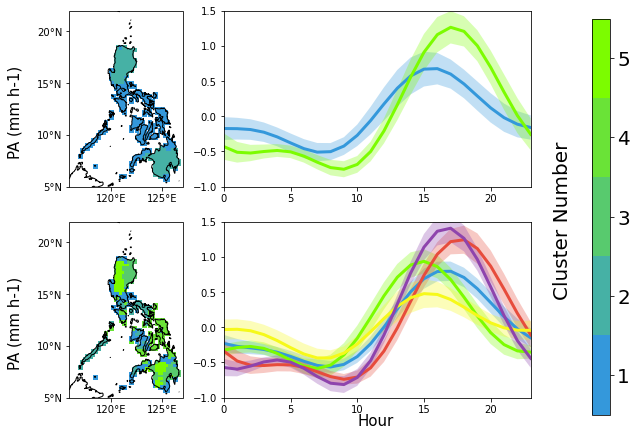

In [28]:


s = 15
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)


ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())

ax11 = fig.add_subplot(gs[0, 1:3])
ax33 = fig.add_subplot(gs[1, 1:3])

plot_background(ax1)
plot_ticks(ax1)
plot_background(ax3)
plot_ticks(ax3)

cmap = mycolorbar1
bounds = np.arange(0.5,6,1)
norm = colors.BoundaryNorm(bounds,cmap.N)   

cs = ax1.scatter(df['lon'], df['lat'], c=df['cluster_2'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
cs = ax3.scatter(df['lon'], df['lat'], c=df['cluster_5'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax3.set_xlim(116,127)
ax3.set_ylim(5,22)

cax = fig.add_axes([1.0, 0.37, 0.03, 0.5])

cb = fig.colorbar(cs, cax=cax, ticks=bounds)
cb.set_ticks([1,2,3,4,5])
cb.set_ticklabels([1,2,3,4,5])
cb.ax.tick_params(labelsize=20)

################################################################
s = sum_2[sum_2['cluster_2'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax11.plot(t, mu1, lw=3, label='opaque', color='#3498DB')
ax11.fill_between(t, min_, max_, facecolor='#3498DB', alpha=0.3)

s = sum_2[sum_2['cluster_2'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax11.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax11.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)
###################################################################
################################################################
s = sum_5[sum_5['cluster_5'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax33.plot(t, mu1, lw=3, label='opaque', color='#3498DB')
ax33.fill_between(t, min_, max_, facecolor='#3498DB', alpha=0.3)

s = sum_5[sum_5['cluster_5'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax33.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax33.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)

s = sum_5[sum_5['cluster_5'] == 3]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax33.plot(t, mu1, lw=3, label='opaque', color='#E74C3C')
ax33.fill_between(t, min_, max_, facecolor='#E74C3C', alpha=0.3)

s = sum_5[sum_5['cluster_5'] == 4]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax33.plot(t, mu1, lw=3, label='opaque', color='#F6F91A')
ax33.fill_between(t, min_, max_, facecolor='#F6F91A', alpha=0.3)

s = sum_5[sum_5['cluster_5'] == 5]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax33.plot(t, mu1, lw=3, label='opaque', color='#8E44AD')
ax33.fill_between(t, min_, max_, facecolor='#8E44AD', alpha=0.3)
#
################################################################

ax11.set_xlim(0,23)
ax11.set_ylim(-1,1.5)
ax33.set_xlim(0,23)
ax33.set_ylim(-1,1.5)
################################################################
ax1.text(110, 8, 'PA (mm h-1)', rotation=90, fontsize=15)
ax3.text(110, 8,  'PA (mm h-1)', rotation=90, fontsize=15)

ax33.text(10, -1.4, 'Hour', fontsize=15)
plt.text(-10, 2, 'Cluster Number', rotation=90, fontsize=20)

images_dir = 'Images'
plt.savefig(f"{images_dir}/pa_cluster_2_5.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


/var/folders/xg/0rj41p2x6kj48mvld4lq9c380000gn/T/ipykernel_3664/2047951716.py:141: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/pa_cluster_2-4.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


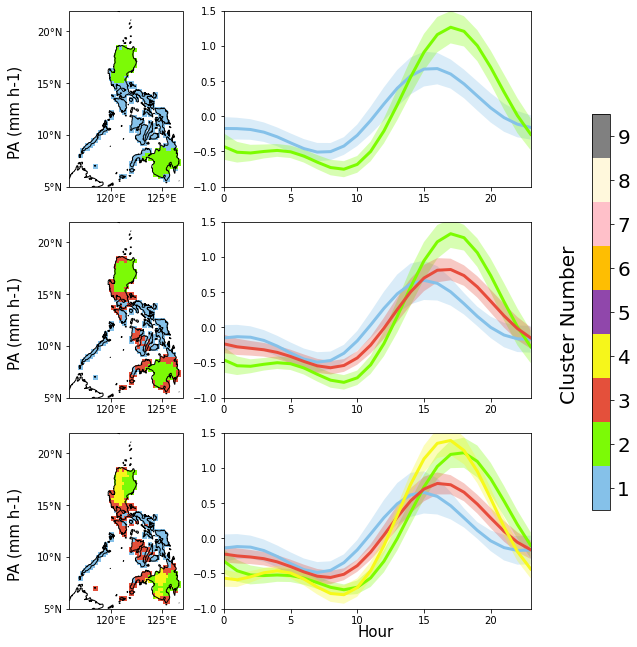

In [65]:


s = 15
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)


ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree())

ax11 = fig.add_subplot(gs[0, 1:3])
ax22 = fig.add_subplot(gs[1, 1:3])
ax33 = fig.add_subplot(gs[2, 1:3])

plot_background(ax1)
plot_ticks(ax1)
plot_background(ax2)
plot_ticks(ax2)
plot_background(ax3)
plot_ticks(ax3)

cmap = mycolorbar1
bounds = np.arange(0.5,10,1)
norm = colors.BoundaryNorm(bounds,cmap.N)   

cs = ax1.scatter(df['lon'], df['lat'], c=df['cluster_2'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
cs = ax2.scatter(df['lon'], df['lat'], c=df['cluster_3'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
cs = ax3.scatter(df['lon'], df['lat'], c=df['cluster_4'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax2.set_xlim(116,127)
ax2.set_ylim(5,22)
ax3.set_xlim(116,127)
ax3.set_ylim(5,22)

cax = fig.add_axes([1.0, 0.25, 0.03, 0.5])

cb = fig.colorbar(cs, cax=cax, ticks=bounds)
cb.set_ticks([1,2,3,4,5,6,7,8,9])
cb.set_ticklabels([1,2,3,4,5,6,7,8,9])
cb.ax.tick_params(labelsize=20)

################################################################
s = sum_2[sum_2['cluster_2'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax11.plot(t, mu1, lw=3, label='opaque', color='#85c1e9')
ax11.fill_between(t, min_, max_, facecolor='#85c1e9', alpha=0.3)

s = sum_2[sum_2['cluster_2'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax11.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax11.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)
###################################################################
################################################################
s = sum_3[sum_3['cluster_3'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax22.plot(t, mu1, lw=3, label='opaque', color='#85c1e9')
ax22.fill_between(t, min_, max_, facecolor='#85c1e9', alpha=0.3)

s = sum_3[sum_3['cluster_3'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax22.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax22.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)

s = sum_3[sum_3['cluster_3'] == 3]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax22.plot(t, mu1, lw=3, label='opaque', color='#E74C3C')
ax22.fill_between(t, min_, max_, facecolor='#E74C3C', alpha=0.3)
################################################################
################################################################
s = sum_4[sum_4['cluster_4'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax33.plot(t, mu1, lw=3, label='opaque', color='#85c1e9')
ax33.fill_between(t, min_, max_, facecolor='#85c1e9', alpha=0.3)

s = sum_4[sum_4['cluster_4'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax33.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax33.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)

s = sum_4[sum_4['cluster_4'] == 3]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax33.plot(t, mu1, lw=3, label='opaque', color='#E74C3C')
ax33.fill_between(t, min_, max_, facecolor='#E74C3C', alpha=0.3)

s = sum_4[sum_4['cluster_4'] == 4]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']

ax33.plot(t, mu1, lw=3, label='opaque', color='#F6F91A')
ax33.fill_between(t, min_, max_, facecolor='#F6F91A', alpha=0.3)
################################################################

ax11.set_xlim(0,23)
ax11.set_ylim(-1,1.5)
ax22.set_xlim(0,23)
ax22.set_ylim(-1,1.5)
ax33.set_xlim(0,23)
ax33.set_ylim(-1,1.5)
################################################################
ax1.text(110, 8, 'PA (mm h-1)', rotation=90, fontsize=15)
ax2.text(110, 8,  'PA (mm h-1)', rotation=90, fontsize=15)
ax3.text(110, 8,  'PA (mm h-1)', rotation=90, fontsize=15)

ax33.text(10, -1.4, 'Hour', fontsize=15)
plt.text(-15, 3, 'Cluster Number', rotation=90, fontsize=20)

images_dir = 'Images'
plt.savefig(f"{images_dir}/pa_cluster_2-4.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


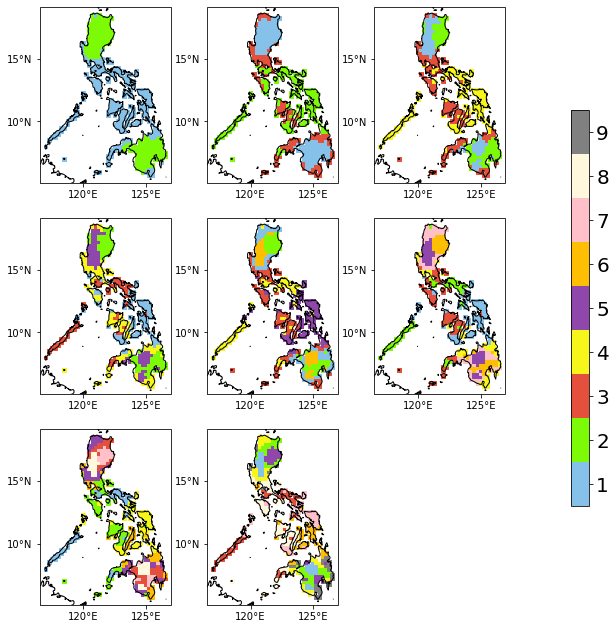

In [35]:
s = 15
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)


ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())

ax4 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax5 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(gs[1, 2], projection=ccrs.PlateCarree())

ax7 = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree())
ax8 = fig.add_subplot(gs[2, 1], projection=ccrs.PlateCarree())


plot_background(ax1)
plot_ticks(ax1)
plot_background(ax2)
plot_ticks(ax2)
plot_background(ax3)
plot_ticks(ax3)
plot_background(ax4)
plot_ticks(ax4)
plot_background(ax5)
plot_ticks(ax5)
plot_background(ax6)
plot_ticks(ax6)
plot_background(ax7)
plot_ticks(ax7)
plot_background(ax8)
plot_ticks(ax8)

cmap = mycolorbar1
bounds = np.arange(0.5,10,1)
norm = colors.BoundaryNorm(bounds,cmap.N)   

cs = ax1.scatter(df['lon'], df['lat'], c=df['cluster_2'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
cs = ax2.scatter(df['lon'], df['lat'], c=df['cluster_3'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
cs = ax3.scatter(df['lon'], df['lat'], c=df['cluster_4'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
cs = ax4.scatter(df['lon'], df['lat'], c=df['cluster_5'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
cs = ax5.scatter(df['lon'], df['lat'], c=df['cluster_6'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
cs = ax6.scatter(df['lon'], df['lat'], c=df['cluster_7'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
cs = ax7.scatter(df['lon'], df['lat'], c=df['cluster_8'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())
cs = ax8.scatter(df['lon'], df['lat'], c=df['cluster_9'],  cmap=mycolorbar1, norm=norm,  s=s, marker="s", transform=ccrs.PlateCarree())



cax = fig.add_axes([1.0, 0.25, 0.03, 0.5])
cb = fig.colorbar(cs, cax=cax, ticks=bounds)
cb.set_ticks([1,2,3,4,5,6,7,8,9])
cb.set_ticklabels([1,2,3,4,5,6,7,8,9])
cb.ax.tick_params(labelsize=20)



In [ ]:


color_dict = dict({1: '#85c1e9',
               2: '#7CFC00',
               3 : '#E74C3C',
               4 : '#F6F91A',
               5 : '#8E44AD',
               6 : '#FFBF00',
               7: '#FFC0CB',
               8: '#FFF8DC',
               9 : '#808080'})



fig = plt.figure(figsize=(11,8.5))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
                      
                      
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"
################################################################
s = sum_2[sum_2['cluster_2'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax1.plot(t, mu1, lw=3, label='opaque', color='#85c1e9')
ax1.fill_between(t, min_, max_, facecolor='#85c1e9', alpha=0.3)

s = sum_2[sum_2['cluster_2'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax1.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax1.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)
###################################################################
################################################################
s = sum_3[sum_3['cluster_3'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax2.plot(t, mu1, lw=3, label='opaque', color='#85c1e9')
ax2.fill_between(t, min_, max_, facecolor='#85c1e9', alpha=0.3)

s = sum_3[sum_3['cluster_3'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax2.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax2.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)

s = sum_3[sum_3['cluster_3'] == 3]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax2.plot(t, mu1, lw=3, label='opaque', color='#E74C3C')
ax2.fill_between(t, min_, max_, facecolor='#E74C3C', alpha=0.3)
################################################################
################################################################
s = sum_4[sum_4['cluster_4'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax3.plot(t, mu1, lw=3, label='opaque', color='#85c1e9')
ax3.fill_between(t, min_, max_, facecolor='#85c1e9', alpha=0.3)

s = sum_4[sum_4['cluster_4'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax3.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax3.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)

s = sum_4[sum_4['cluster_4'] == 3]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax3.plot(t, mu1, lw=3, label='opaque', color='#E74C3C')
ax3.fill_between(t, min_, max_, facecolor='#E74C3C', alpha=0.3)

s = sum_4[sum_4['cluster_4'] == 4]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax3.plot(t, mu1, lw=3, label='opaque', color='#F6F91A')
ax3.fill_between(t, min_, max_, facecolor='#F6F91A', alpha=0.3)
################################################################

ax1.set_xlim(0,23)
ax1.set_ylim(-1,1.5)
ax2.set_xlim(0,23)
ax2.set_ylim(-1,1.5)
ax3.set_xlim(0,23)
ax3.set_ylim(-1,1.5)
################################################################
ax1.text(-8, 0.2, 'PA (mm h-1)', rotation=90, fontsize=15)
ax4.text(-0.38, 0.2, 'PA (mm h-1)', rotation=90, fontsize=15)
ax7.text(-0.38, 0.2, 'PA (mm h-1)', rotation=90, fontsize=15)
ax7.text(0.38, -0.28, 'Hour', fontsize=15)
ax8.text(0.38, -0.28, 'Hour', fontsize=15)



In [ ]:


color_dict = dict({1: '#85c1e9',
               2: '#7CFC00',
               3 : '#E74C3C',
               4 : '#F6F91A',
               5 : '#8E44AD',
               6 : '#FFBF00',
               7: '#FFC0CB',
               8: '#FFF8DC',
               9 : '#808080'})



fig = plt.figure(figsize=(11,8.5))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])

                      
                      
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"
################################################################
s = sum_2[sum_2['cluster_2'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax1.plot(t, mu1, lw=3, label='opaque', color='#85c1e9')
ax1.fill_between(t, min_, max_, facecolor='#85c1e9', alpha=0.3)

s = sum_2[sum_2['cluster_2'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax1.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax1.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)
###################################################################
################################################################
s = sum_3[sum_3['cluster_3'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax2.plot(t, mu1, lw=3, label='opaque', color='#85c1e9')
ax2.fill_between(t, min_, max_, facecolor='#85c1e9', alpha=0.3)

s = sum_3[sum_3['cluster_3'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax2.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax2.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)

s = sum_3[sum_3['cluster_3'] == 3]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax2.plot(t, mu1, lw=3, label='opaque', color='#E74C3C')
ax2.fill_between(t, min_, max_, facecolor='#E74C3C', alpha=0.3)
################################################################
################################################################
s = sum_4[sum_4['cluster_4'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax3.plot(t, mu1, lw=3, label='opaque', color='#85c1e9')
ax3.fill_between(t, min_, max_, facecolor='#85c1e9', alpha=0.3)

s = sum_4[sum_4['cluster_4'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax3.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax3.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)

s = sum_4[sum_4['cluster_4'] == 3]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax3.plot(t, mu1, lw=3, label='opaque', color='#E74C3C')
ax3.fill_between(t, min_, max_, facecolor='#E74C3C', alpha=0.3)

s = sum_4[sum_4['cluster_4'] == 4]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
ax3.plot(t, mu1, lw=3, label='opaque', color='#F6F91A')
ax3.fill_between(t, min_, max_, facecolor='#F6F91A', alpha=0.3)
################################################################

ax1.set_xlim(0,23)
ax1.set_ylim(0,3)
ax2.set_xlim(0,23)
ax2.set_ylim(0,3)
ax3.set_xlim(0,23)
ax3.set_ylim(0,3)
################################################################
ax1.text(-6, 0.25, 'PA (mm h-1)', rotation=90, fontsize=15)
ax2.text(-6, 0.25, 'PA (mm h-1)', rotation=90, fontsize=15)
ax3.text(-6, 0.25, 'PA (mm h-1)', rotation=90, fontsize=15)
#ax1.text(8, -0.7, 'Hour', fontsize=15)
#ax2.text(8, -0.7,'Hour', fontsize=15)
ax3.text(8, -0.7, 'Hour', fontsize=15)



images_dir = 'Images'
plt.savefig(f"{images_dir}/series.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")